In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# Load signals and labels
gaussian_signal = np.load('/content/drive/MyDrive/signal_-17dB_gaussian_fixed.npy')
impulsive_signal = np.load('/content/drive/MyDrive/signal_-17dB_impulsive_fixed.npy')
gaussian_labels = np.load('/content/drive/MyDrive/label_-17dB_gaussian.npy')
impulsive_labels = np.load('/content/drive/MyDrive/label_-17dB_impulsive.npy')

# Extract 30000 samples from each signal and label
num_samples = 30000
gaussian_signal_30000 = gaussian_signal[:num_samples]
impulsive_signal_30000 = impulsive_signal[:num_samples]
gaussian_labels_30000 = gaussian_labels[:num_samples]
impulsive_labels_30000 = impulsive_labels[:num_samples]

# Save the 30000-sample files with "_30000.npy" suffix
np.save('/content/drive/MyDrive/signal_-17dB_gaussian_fixed_30000.npy', gaussian_signal_30000)
np.save('/content/drive/MyDrive/signal_-17dB_impulsive_fixed_30000.npy', impulsive_signal_30000)
np.save('/content/drive/MyDrive/label_-17dB_gaussian_30000.npy', gaussian_labels_30000)
np.save('/content/drive/MyDrive/label_-17dB_impulsive_30000.npy', impulsive_labels_30000)


In [ ]:
import numpy as np

gaussian_signal_30000 = np.load('/content/drive/MyDrive/30000/signal_-17dB_gaussian_fixed_30000.npy')
impulsive_signal_30000 = np.load('/content/drive/MyDrive/30000/signal_-17dB_impulsive_fixed_30000.npy')
gaussian_labels_30000 = np.load('/content/drive/MyDrive/30000/label_-17dB_gaussian_30000.npy')
impulsive_labels_30000 = np.load('/content/drive/MyDrive/30000/label_-17dB_impulsive_30000.npy')
# Reload the saved 30000-sample files into the same variables
gaussian_signal = gaussian_signal_30000
impulsive_signal = impulsive_signal_30000
gaussian_labels = gaussian_labels_30000
impulsive_labels = impulsive_labels_30000

print("Data reloaded with 30000 samples each.")


Data reloaded with 30000 samples each.


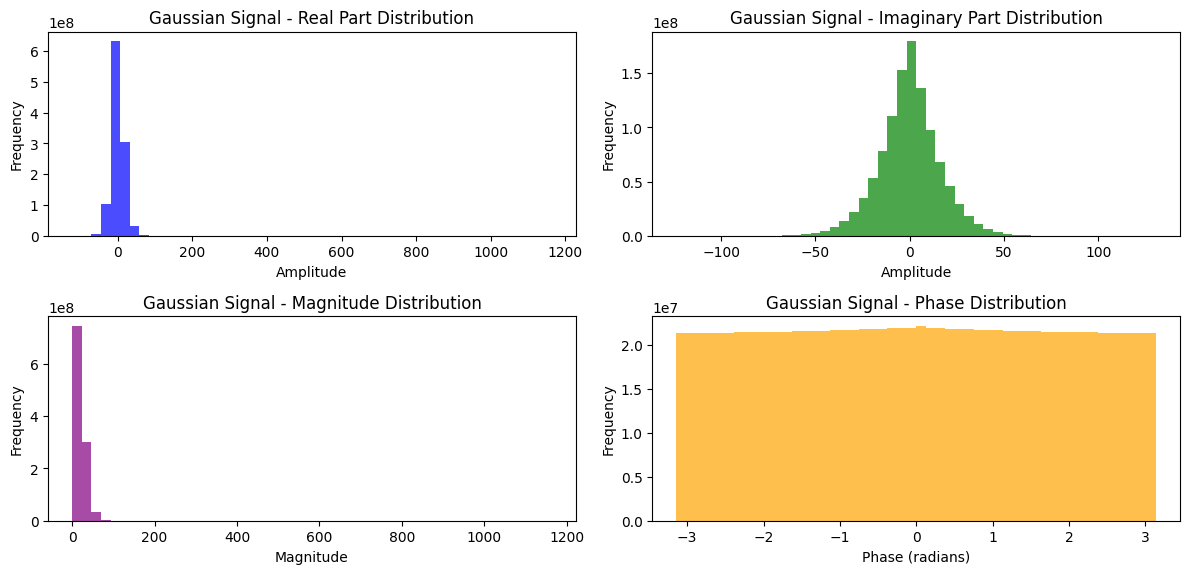

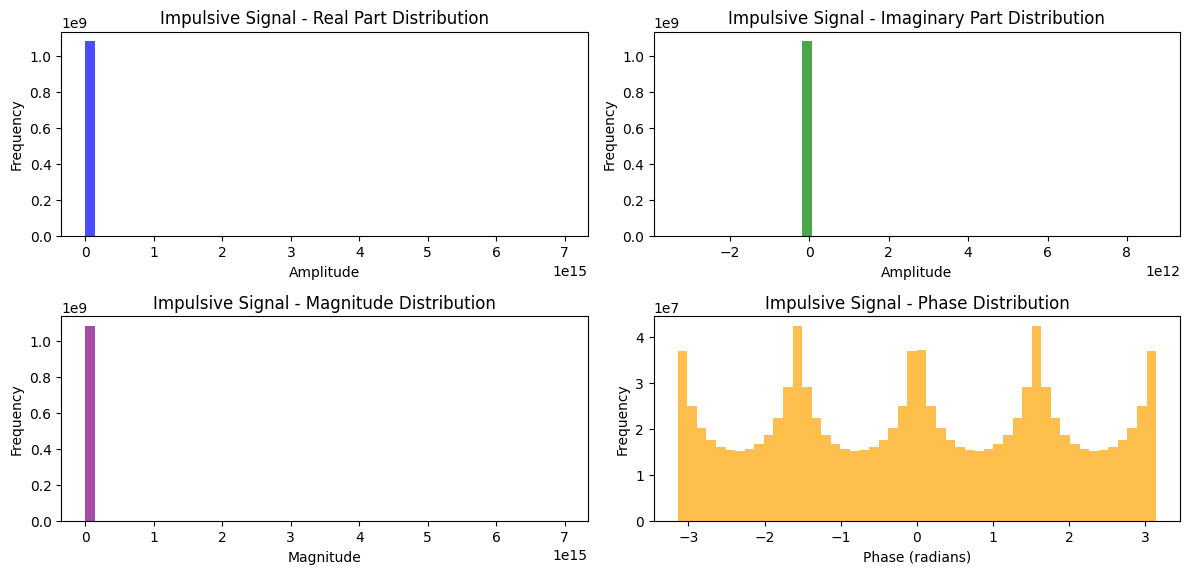

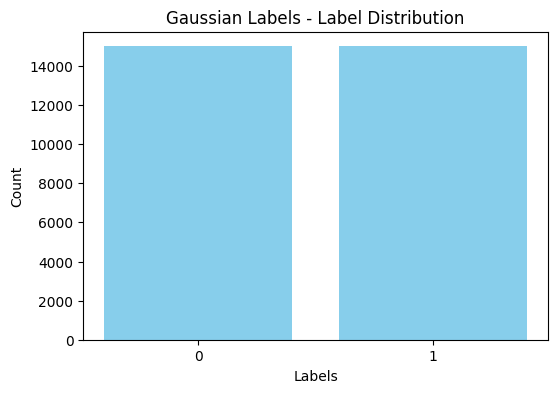

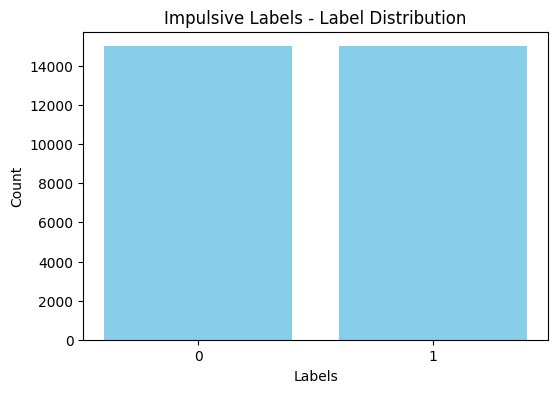

In [ ]:
import matplotlib.pyplot as plt

# Function to plot signal distribution
def plot_signal_distribution(signal, title):
    # Separate real and imaginary parts
    real_part = signal.real
    imag_part = signal.imag

    # Calculate magnitude and phase
    magnitude = np.abs(signal)
    phase = np.angle(signal)

    # Plot histograms for real and imaginary parts
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.hist(real_part.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f'{title} - Real Part Distribution')
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    plt.hist(imag_part.flatten(), bins=50, color='green', alpha=0.7)
    plt.title(f'{title} - Imaginary Part Distribution')
    plt.xlabel('Amplitude')
    plt.ylabel('Frequency')

    # Plot histograms for magnitude and phase
    plt.subplot(2, 2, 3)
    plt.hist(magnitude.flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f'{title} - Magnitude Distribution')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    plt.hist(phase.flatten(), bins=50, color='orange', alpha=0.7)
    plt.title(f'{title} - Phase Distribution')
    plt.xlabel('Phase (radians)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Plot signal distributions for Gaussian and Impulsive signals
plot_signal_distribution(gaussian_signal, "Gaussian Signal")
plot_signal_distribution(impulsive_signal, "Impulsive Signal")

# Function to plot label distribution
def plot_label_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(6, 4))
    plt.bar(unique, counts, color='skyblue')
    plt.title(f'{title} - Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(unique)
    plt.show()

# Plot label distributions for Gaussian and Impulsive signals
plot_label_distribution(gaussian_labels, "Gaussian Labels")
plot_label_distribution(impulsive_labels, "Impulsive Labels")


In [ ]:
# Step 6: Define and apply normalization functions
def z_score_normalize(signal):
    return (signal - np.mean(signal)) / np.std(signal)

def complex_magnitude_phase_normalize(signal):
    magnitude = np.abs(signal)
    phase = np.angle(signal)
    norm_magnitude = z_score_normalize(magnitude)
    norm_phase = z_score_normalize(phase)
    real_part = norm_magnitude * np.cos(norm_phase)
    imag_part = norm_magnitude * np.sin(norm_phase)
    return real_part, imag_part

def process_signal(signal, labels, num_samples=30000):
    real_part, imag_part = complex_magnitude_phase_normalize(signal)
    selected_real = real_part[:num_samples]
    selected_imag = imag_part[:num_samples]
    selected_labels = labels[:num_samples]
    return selected_real, selected_imag, selected_labels


In [ ]:
# Step 7: Process Gaussian and Impulsive signals and merge them
gaussian_real, gaussian_imag, gaussian_labels = process_signal(gaussian_signal, gaussian_labels)
impulsive_real, impulsive_imag, impulsive_labels = process_signal(impulsive_signal, impulsive_labels)

merged_real = np.concatenate((gaussian_real, impulsive_real))
merged_imag = np.concatenate((gaussian_imag, impulsive_imag))
merged_labels = np.concatenate((gaussian_labels, impulsive_labels))

merged_signals = np.stack((merged_real, merged_imag), axis=-1)
indices = np.arange(merged_signals.shape[0])
np.random.shuffle(indices)

merged_signals = merged_signals[indices]
merged_labels = merged_labels[indices]

# Save normalized and shuffled signals and labels
np.save('/content/drive/MyDrive/30000/merged_signals_30000.npy', merged_signals)
np.save('/content/drive/MyDrive/30000/merged_labels_30000.npy', merged_labels)


In [ ]:
import numpy as np
merged_signals = np.load('/content/drive/MyDrive/30000/merged_signals_30000.npy')
merged_labels = np.load('/content/drive/MyDrive/30000/merged_labels_30000.npy')

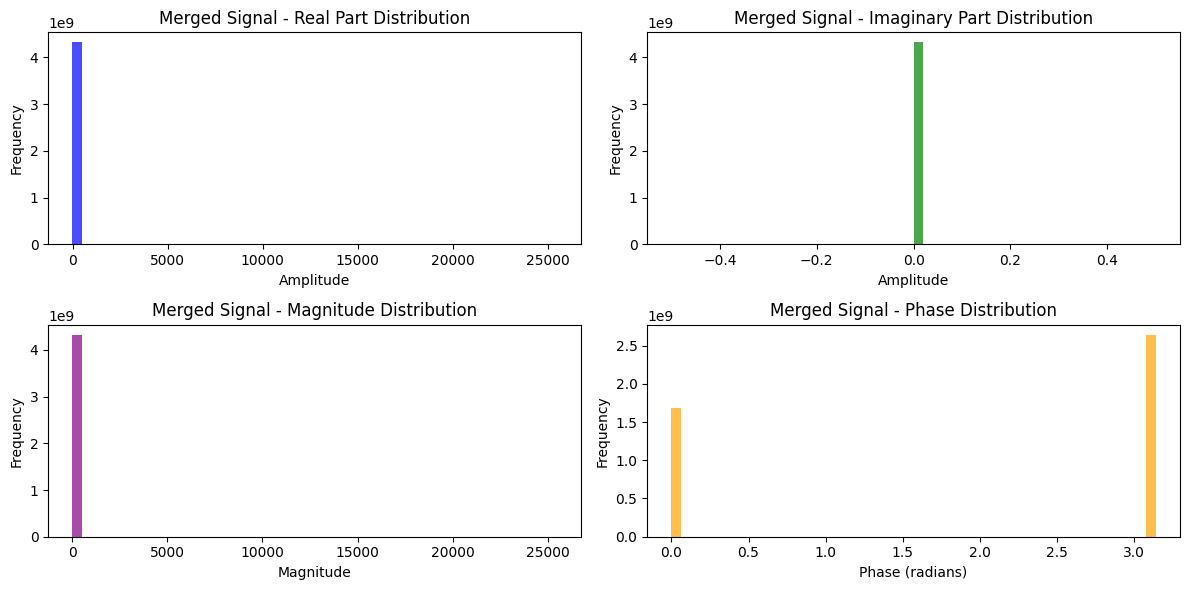

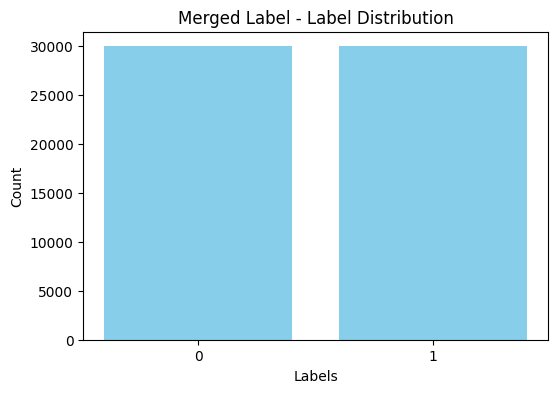

In [ ]:
# Step 8: Plot distributions for merged signals and labels
plot_signal_distribution(merged_signals, "Merged Signal")
plot_label_distribution(merged_labels, "Merged Label")


In [ ]:
# Step 9: Split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(merged_signals, merged_labels, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

# plot_signal_distribution(X_train, "X_train")
# plot_label_distribution(y_train, "y_train")

# plot_signal_distribution(X_val, "X_val")
# plot_label_distribution(y_val, "y_val")


(48000, 36, 1000, 2) (12000, 36, 1000, 2)
(48000,) (12000,)


In [ ]:
# Step 10: Hyperparameter tuning and model setup using Keras Tuner
!pip install keras-tuner

import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

tuner_dir = '/content/drive/MyDrive/10000/kt_tuning'
tuner = kt.Hyperband(
    hypermodel=None,
    objective='val_accuracy',
    max_epochs=50,
    directory=tuner_dir,
    project_name='10000_17db_binary'
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_filters = best_hps.get('filters')
best_units = best_hps.get('units')
best_dropout = best_hps.get('dropout')
best_learning_rate = best_hps.get('learning_rate')

print("Best Hyperparameters:")
print(f"Filters: {best_filters}")
print(f"Units: {best_units}")
print(f"Dropout: {best_dropout}")
print(f"Learning Rate: {best_learning_rate}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00
Reloading Tuner from /content/drive/MyDrive/10000/kt_tuning/10000_17db_binary/tuner0.json
Best Hyperparameters:
Filters: 48
Units: 128
Dropout: 0.2
Learning Rate: 0.001


In [ ]:
# Step 11: Define the DS2MA model with best hyperparameters
def create_ds2ma_model(input_shape, num_channels, filters, units, dropout, learning_rate):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(filters, kernel_size=(3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters * 2, kernel_size=(3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters * 4, kernel_size=(3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(units, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(num_channels, activation='sigmoid')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (36, 1000, 2)
num_channels = 1

# Create the model using the best hyperparameters
model = create_ds2ma_model(
    input_shape,
    num_channels,
    filters=best_filters,
    units=best_units,
    dropout=best_dropout,
    learning_rate=best_learning_rate
)

# Display the model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36, 1000, 2)]     0         
                                                                 
 conv2d (Conv2D)             (None, 34, 998, 48)       912       
                                                                 
 max_pooling2d (MaxPooling2  (None, 17, 499, 48)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 497, 96)       41568     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 248, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 246, 192)       166080

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Save the best model
model.save('/content/drive/MyDrive/30000/best_30000_17db_model.h5')

Epoch 1/20
1500/1500 [==============================] - 610s 406ms/step - loss: 0.3885 - accuracy: 0.7300 - val_loss: 0.3478 - val_accuracy: 0.7493
Epoch 2/20
1500/1500 [==============================] - 600s 400ms/step - loss: 0.3564 - accuracy: 0.7466 - val_loss: 0.3471 - val_accuracy: 0.7496
Epoch 3/20
1500/1500 [==============================] - 598s 399ms/step - loss: 0.3550 - accuracy: 0.7464 - val_loss: 0.3642 - val_accuracy: 0.7450
Epoch 4/20
1500/1500 [==============================] - 592s 395ms/step - loss: 0.3506 - accuracy: 0.7492 - val_loss: 0.3442 - val_accuracy: 0.7504
Epoch 5/20
1500/1500 [==============================] - 596s 397ms/step - loss: 0.3495 - accuracy: 0.7494 - val_loss: 0.3487 - val_accuracy: 0.7491
Epoch 6/20
1500/1500 [==============================] - 598s 399ms/step - loss: 0.3513 - accuracy: 0.7455 - val_loss: 0.3439 - val_accuracy: 0.7507
Epoch 7/20
1500/1500 [==============================] - 592s 395ms/step - loss: 0.3483 - accuracy: 0.7468 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Assuming you have a trained Keras model
weights_dict = {layer.name: layer.get_weights() for layer in model.layers if layer.get_weights()}

# Define the path to save the weights
save_path = '/content/drive/MyDrive/30000/layer_weights'

# Ensure the directory exists
import os
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Save each layer's weights as separate .npy files
for layer_name, weights in weights_dict.items():
    for i, weight_array in enumerate(weights):
        # Construct a unique file name for each weight array in the layer
        weight_file = f"{save_path}/{layer_name}_weight_{i}.npy"
        # Save the weight array
        np.save(weight_file, weight_array)
        print(f"Saved {weight_file}")


Saved /content/drive/MyDrive/30000/layer_weights/conv2d_weight_0.npy
Saved /content/drive/MyDrive/30000/layer_weights/conv2d_weight_1.npy
Saved /content/drive/MyDrive/30000/layer_weights/conv2d_1_weight_0.npy
Saved /content/drive/MyDrive/30000/layer_weights/conv2d_1_weight_1.npy
Saved /content/drive/MyDrive/30000/layer_weights/conv2d_2_weight_0.npy
Saved /content/drive/MyDrive/30000/layer_weights/conv2d_2_weight_1.npy
Saved /content/drive/MyDrive/30000/layer_weights/dense_weight_0.npy
Saved /content/drive/MyDrive/30000/layer_weights/dense_weight_1.npy
Saved /content/drive/MyDrive/30000/layer_weights/dense_1_weight_0.npy
Saved /content/drive/MyDrive/30000/layer_weights/dense_1_weight_1.npy


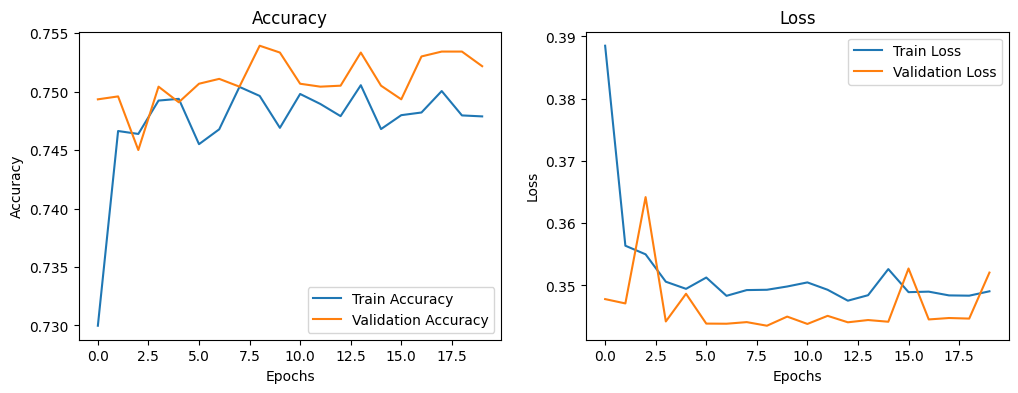

In [ ]:
import matplotlib.pyplot as plt
# Plot validation accuracy and loss
def plot_training_history(history):
    # Plot validation accuracy
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model = load_model('/content/drive/MyDrive/30000/best_30000_17db_model.h5')

# Step 2: Evaluate the model on the test data
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 3: Make predictions on the test data
predictions = model.predict(X_val)


Test Loss: 0.3521
Test Accuracy: 0.7522
375/375 [==============================] - 29s 78ms/step


Mean of positive class probabilities: 0.5004037022590637
Using threshold: 0.375
Precision: 0.6686
Recall: 1.0000
F1 Score: 0.8014
Confusion Matrix:
[[3029 2973]
 [   0 5998]]


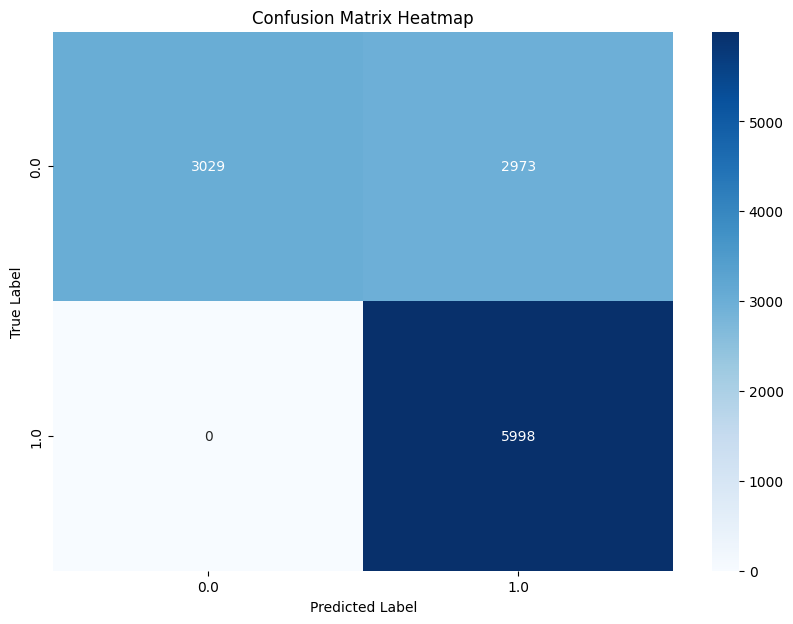

In [ ]:

# Calculate the mean probability for predictions of the positive class
mean_pred = np.mean(predictions)  # Mean of the predicted probabilities
print(f"Mean of positive class probabilities: {mean_pred}")

# Define a custom threshold (you can start with the mean and adjust if needed)
threshold = 0.375
print(f"Using threshold: {threshold}")

# Set threshold to classify predictions
predicted_classes = (predictions >= threshold).astype(int)

# Determine if y_val is one-hot encoded or not
if len(y_val.shape) == 1:  # y_val is 1D
    y_val_classes = y_val  # Use directly
else:  # y_val is 2D (one-hot encoded)
    y_val_classes = np.argmax(y_val, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_val_classes, predicted_classes)
recall = recall_score(y_val_classes, predicted_classes)
f1 = f1_score(y_val_classes, predicted_classes)

# Print precision, recall, and F1 score
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create confusion matrix
conf_mat = confusion_matrix(y_val_classes, predicted_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_mat)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_val_classes),
            yticklabels=np.unique(y_val_classes))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
